In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Exercise 1: 
### In this task you will carry out data analysis and build a regression a model for real state price prediction. 

# Part b:
### Visualize your data to gain better insights. Explain your findings. 
# AND
# Part c:
### Conduct the following tests. Include Null and Alternative hypothesis:

In [133]:
data = pd.read_csv('Real estate.csv')
data.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [134]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [136]:
# remove NO column
data.drop(columns=['No'], inplace=True)
data.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

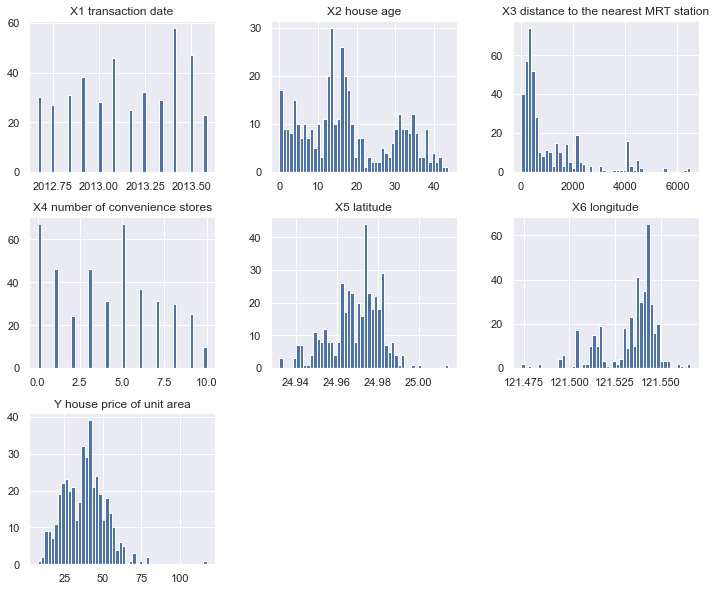

In [137]:
data.hist(bins=50, figsize=(12, 10))

# Analyze the effect of location on price

<Axes: xlabel='X6 longitude', ylabel='X5 latitude'>

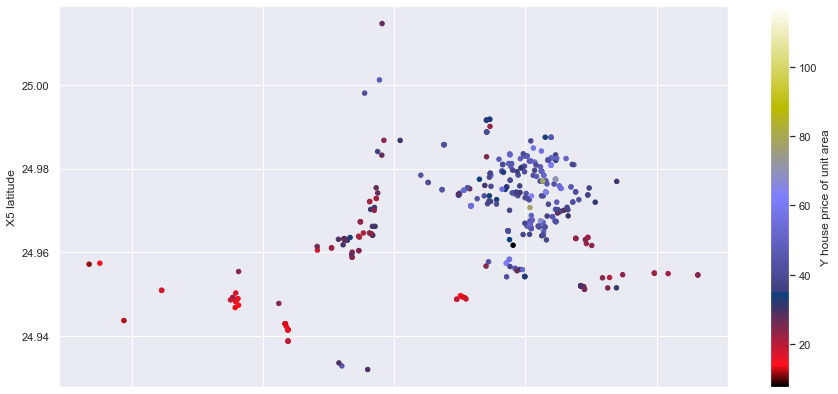

In [138]:
data.plot(kind='scatter', x='X6 longitude', y='X5 latitude', c='Y house price of unit area',
           cmap=plt.get_cmap("gist_stern"), colorbar=True, figsize=(15, 7))

In [139]:
high_longitude = data[data['X6 longitude'] >= 121.538630]
low_longitude = data[data['X6 longitude'] < 121.538630]
print(high_longitude.shape)
print(low_longitude.shape)

(209, 7)
(205, 7)


C:\Users\hi\AppData\Local\Temp\ipykernel_14780\3797954651.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_longitude['Dataset'] = 'H'
C:\Users\hi\AppData\Local\Temp\ipykernel_14780\3797954651.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_longitude['Dataset'] = 'L'
C:\Users\hi\AppData\Local\Temp\ipykernel_14780\3797954651.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for 

<Axes: xlabel='Dataset', ylabel='Y house price of unit area'>

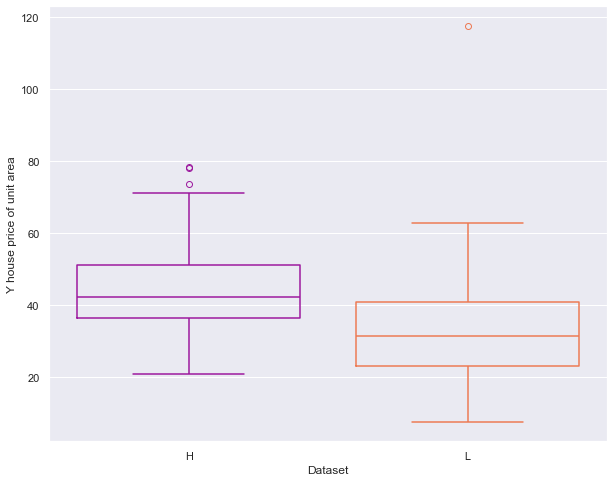

In [140]:
high_longitude['Dataset'] = 'H'
low_longitude['Dataset'] = 'L'
merged_df = pd.concat([high_longitude, low_longitude])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma', fill=False)

C:\Users\hi\AppData\Local\Temp\ipykernel_14780\3604436753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma')


<Axes: xlabel='Dataset', ylabel='Y house price of unit area'>

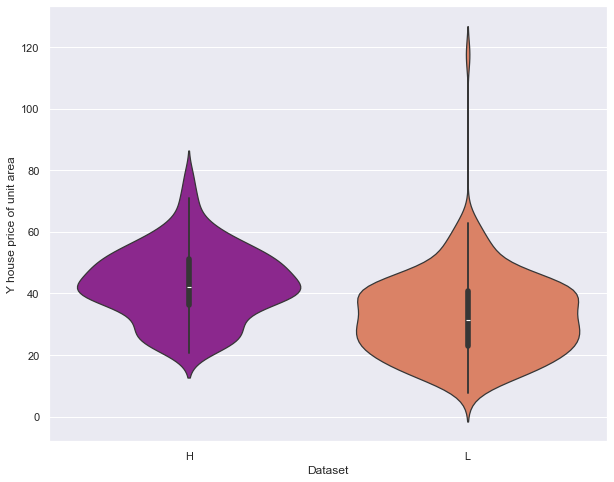

In [141]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma')

# Analyze the effect of age on the price

<Axes: xlabel='House age', ylabel='House price of unit area'>

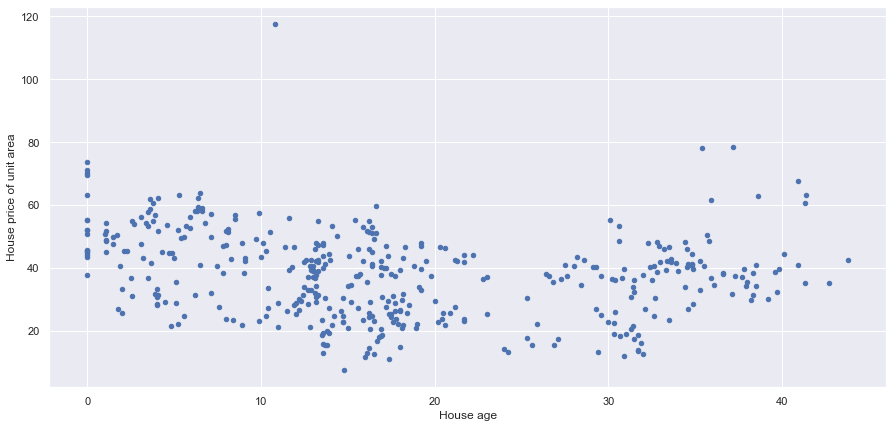

In [142]:
data.plot(kind='scatter', x='X2 house age', y='Y house price of unit area', figsize=(15, 7), xlabel='House age', ylabel='House price of unit area')

In [143]:
old_house = data[data['X2 house age'] >= 16.1]
new_house = data[data['X2 house age'] < 16.1]
print(old_house.shape)
print(new_house.shape)

(209, 7)
(205, 7)


C:\Users\hi\AppData\Local\Temp\ipykernel_14780\1454520382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old_house['Dataset'] = 'O'
C:\Users\hi\AppData\Local\Temp\ipykernel_14780\1454520382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_house['Dataset'] = 'N'
C:\Users\hi\AppData\Local\Temp\ipykernel_14780\1454520382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

<Axes: xlabel='Dataset', ylabel='Y house price of unit area'>

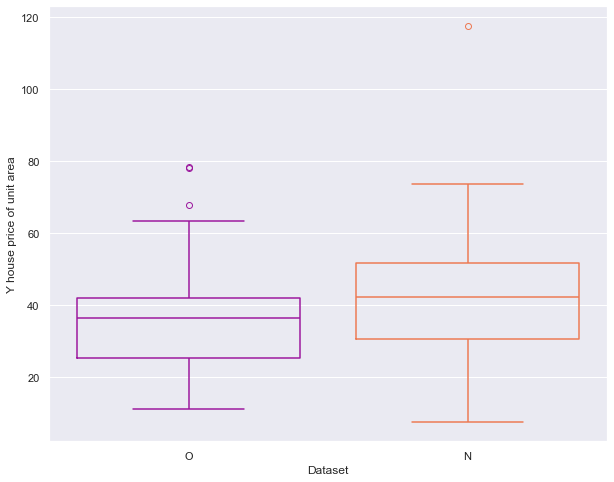

In [144]:
old_house['Dataset'] = 'O'
new_house['Dataset'] = 'N'
merged_df = pd.concat([old_house, new_house])
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.boxplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma', fill=False)

C:\Users\hi\AppData\Local\Temp\ipykernel_14780\3604436753.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma')


<Axes: xlabel='Dataset', ylabel='Y house price of unit area'>

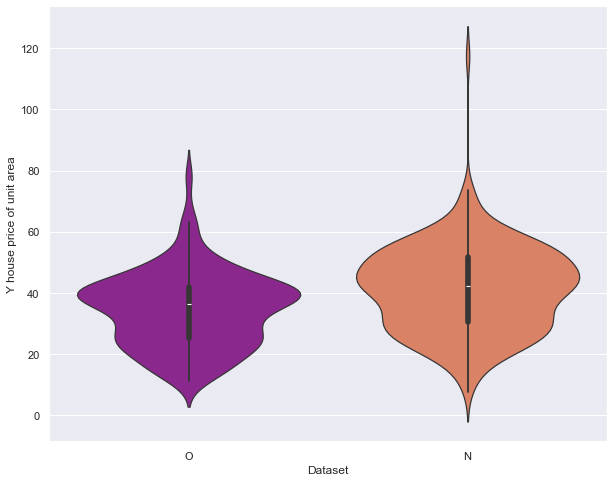

In [145]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set(style="darkgrid")
sns.violinplot(x='Dataset', y='Y house price of unit area', data=merged_df, palette='plasma')

##### Part c: i. Test if the average price per unit area of houses above the median age is significantly different from those below the median age. Use p-value method.

##### $H_{0}: \mu_{old} = \mu_{new}$
##### $H_{1}: \mu_{old} \neq \mu_{new}$
##### $\alpha = 0.05$

In [146]:
alpha = 0.05
stat, p_value = stats.ttest_ind(old_house['Y house price of unit area'], new_house['Y house price of unit area'], equal_var=True, alternative='two-sided')
print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 5.404452714497797e-07
The null hypothesis will be rejected!


# Analyze the effect of number of convinence stores on price

C:\Users\hi\AppData\Local\Temp\ipykernel_14780\1190095451.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.countplot(x='X4 number of convenience stores', data=data, palette='plasma')


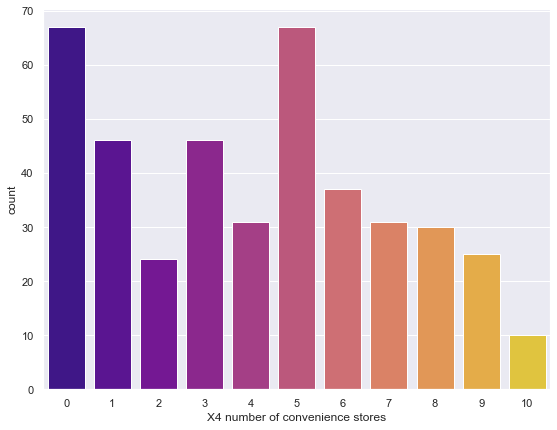

In [147]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.countplot(x='X4 number of convenience stores', data=data, palette='plasma')
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_14780\2784544617.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.violinplot(data=data, x='X4 number of convenience stores', y='Y house price of unit area', palette='plasma')


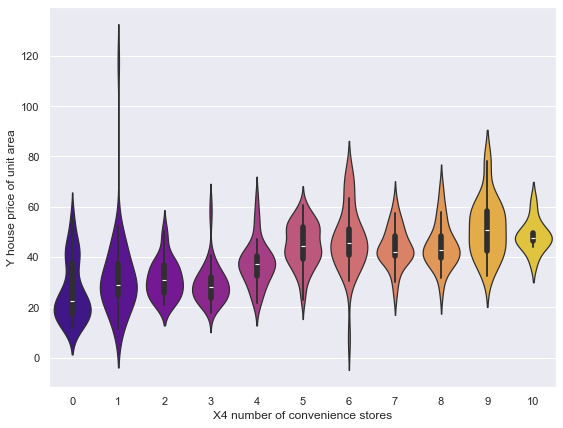

In [148]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.violinplot(data=data, x='X4 number of convenience stores', y='Y house price of unit area', palette='plasma')
plt.show()

C:\Users\hi\AppData\Local\Temp\ipykernel_14780\2935107952.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plt.subplot(121), sns.boxplot(data=data, x='X4 number of convenience stores', y='Y house price of unit area', palette='plasma')


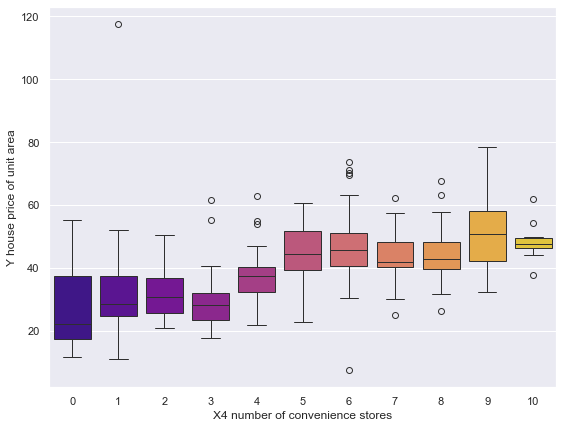

In [149]:
plt.figure(figsize=(20, 7))
plt.subplot(121), sns.boxplot(data=data, x='X4 number of convenience stores', y='Y house price of unit area', palette='plasma')
plt.show()

##### Part c: ii. Investigate if the average price per unit area significantly differs by the number of convenience stores (categorized by "X4 number of convenience stores").

##### $H_{0}: \mu_0 = \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \mu_7 = \mu_8 = \mu_9 = \mu_{10}$
##### $H_{1}: \mu_0 \neq \mu_1 \neq \mu_2 \neq \mu_3 \neq \mu_4 \neq \mu_5 \neq \mu_6 \neq \mu_7 \neq \mu_8 \neq \mu_9 \neq \mu_{10}$

In [150]:
stat, p_value = stats.f_oneway(data[data['X4 number of convenience stores'] == 0]['Y house price of unit area'], data[data['X4 number of convenience stores'] == 1]['Y house price of unit area'], 
                               data[data['X4 number of convenience stores'] == 2]['Y house price of unit area'], data[data['X4 number of convenience stores'] == 3]['Y house price of unit area'], 
                               data[data['X4 number of convenience stores'] == 4]['Y house price of unit area'], data[data['X4 number of convenience stores'] == 5]['Y house price of unit area'], 
                               data[data['X4 number of convenience stores'] == 6]['Y house price of unit area'], data[data['X4 number of convenience stores'] == 7]['Y house price of unit area'], 
                               data[data['X4 number of convenience stores'] == 8]['Y house price of unit area'], data[data['X4 number of convenience stores'] == 9]['Y house price of unit area'], 
                               data[data['X4 number of convenience stores'] == 10]['Y house price of unit area'])

print('P_value: ', end='')
print(p_value)
if alpha >= p_value:
    print('The null hypothesis will be rejected!')
else:
    print('The null hypothesis will be accepted!')

P_value: 1.1781067247237561e-36
The null hypothesis will be rejected!


##### Part c: iii. Choose two categorical variables and test if there's a significant association between them. (You may need to categorize some of the numerical variables.)

In [151]:
new_data = data.copy()
new_data['qualitative longitude'] = new_data['X6 longitude'].apply(lambda x: 'H' if x >= 121.53863  else 'L')
new_data['qualitative age'] = new_data['X2 house age'].apply(lambda x: 'old' if x >= 16.1  else 'new')
new_data.head(10)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,qualitative longitude,qualitative age
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,H,old
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,H,old
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,H,new
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,H,new
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,H,new
5,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1,L,new
6,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3,L,old
7,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7,H,old
8,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8,L,old
9,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1,L,old


In [152]:
contingency_table = pd.crosstab(new_data['qualitative age'], new_data['qualitative longitude'])
print('contingency_table : \n', contingency_table)

contingency_table : 
 qualitative longitude    H    L
qualitative age                
new                    107   98
old                    102  107


In [153]:
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table.values)
print('chi2 stat : {} , p_value : {}'.format(chi2_stat, p_value))

chi2 stat : 0.3501354884019943 , p_value : 0.5540364433965241


In [154]:
# splitting target and train-test split
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, train_size=0.8, random_state=42)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 331 entries, 192 to 102
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     331 non-null    float64
 1   X2 house age                            331 non-null    float64
 2   X3 distance to the nearest MRT station  331 non-null    float64
 3   X4 number of convenience stores         331 non-null    int64  
 4   X5 latitude                             331 non-null    float64
 5   X6 longitude                            331 non-null    float64
 6   Y house price of unit area              331 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 20.7 KB


# Part d:
### Calculate the correlation between each variable and the target variable ("Y house price of unit area") to find which variable has the highest influence on the target.

<Figure size 720x504 with 0 Axes>

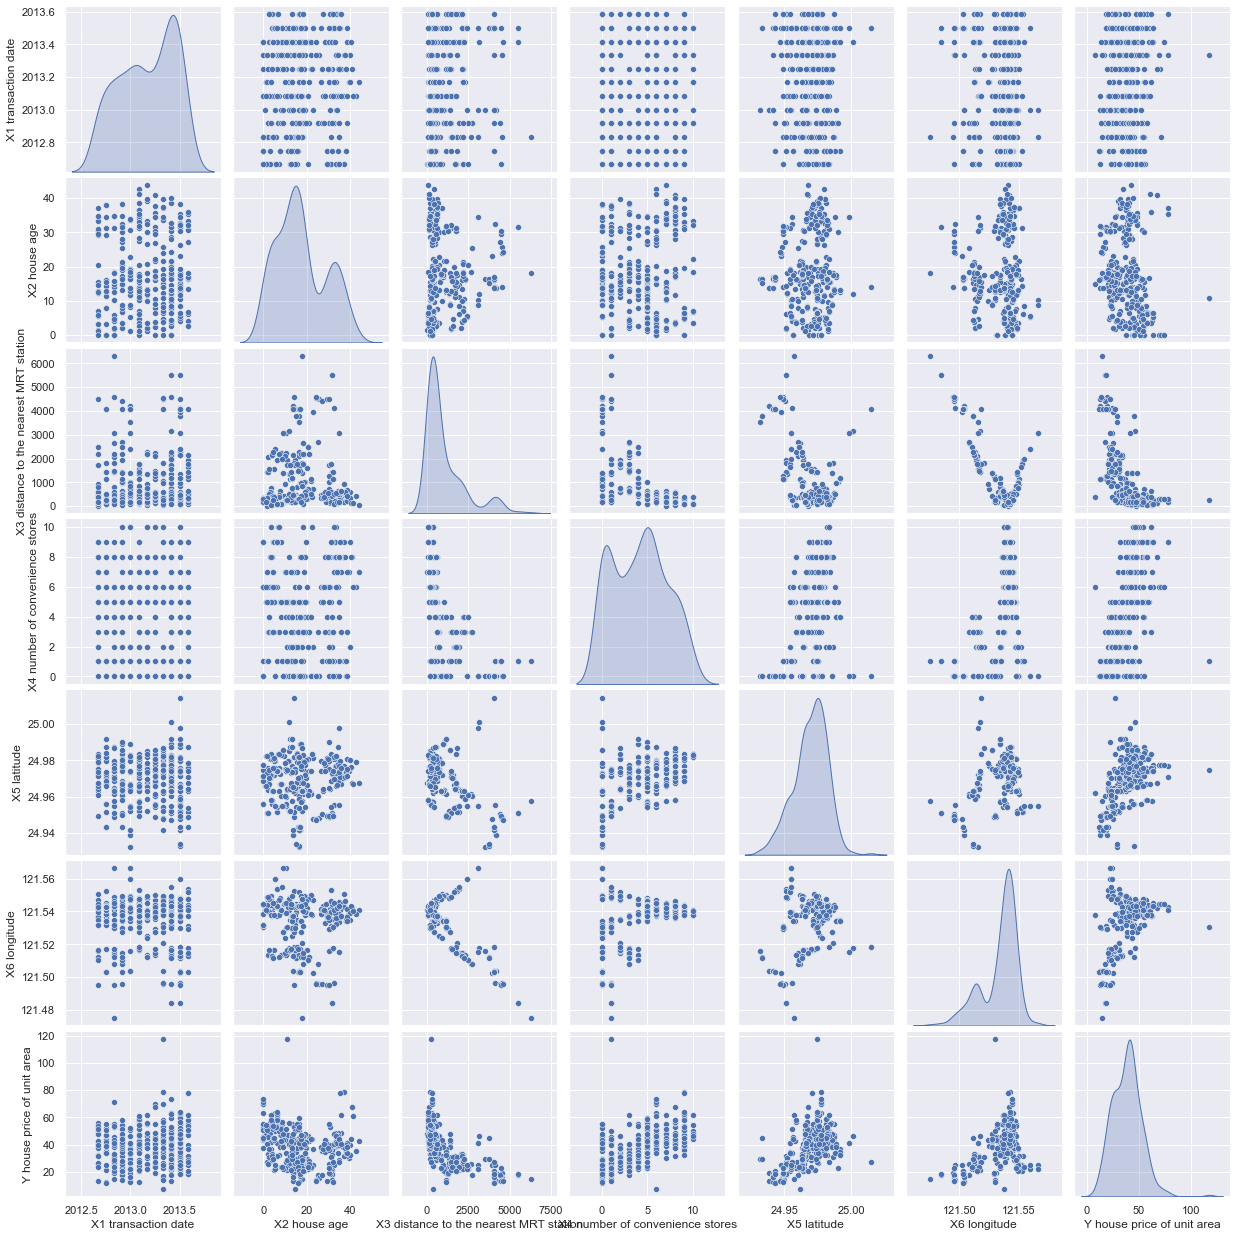

In [155]:
plt.figure(figsize=(10, 7))
sns.pairplot(train_data, diag_kind="kde")

<Axes: >

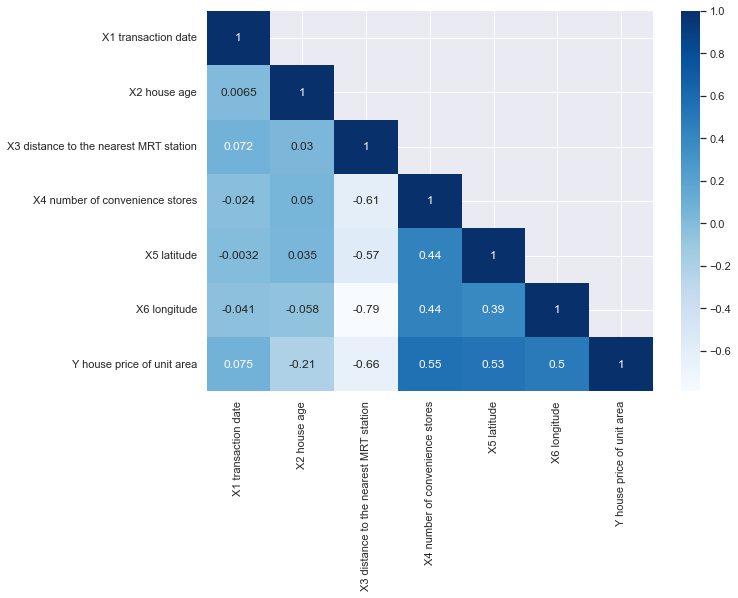

In [156]:
corr_matrix = train_data.corr()
plt.figure(figsize=(10, 7))
corr_matrix = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(np.bool_))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')

# Part a:
### Explore and clean the dataset. Explain your steps and reasons behind your actions (such as choosing a specific imputation technique).

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

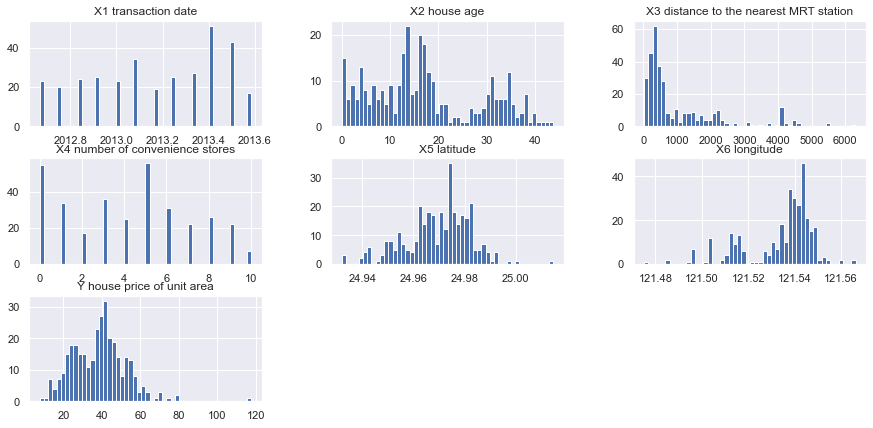

In [157]:
train_data.hist(bins=50, figsize=(15, 7))

In [158]:
# omitting outliers
def z_score_outlier(data):
    drop_outliers = np.array([])
    for column in data.columns:
        upper_bound = data[column].mean() + 3 * data[column].std()
        lower_bound = data[column].mean() - 3 * data[column].std()
        data = data.loc[(data[column] < upper_bound) & (data[column] > lower_bound)]

    return data

In [159]:
new_train_data = z_score_outlier(train_data)
new_train_data.shape

(325, 7)

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

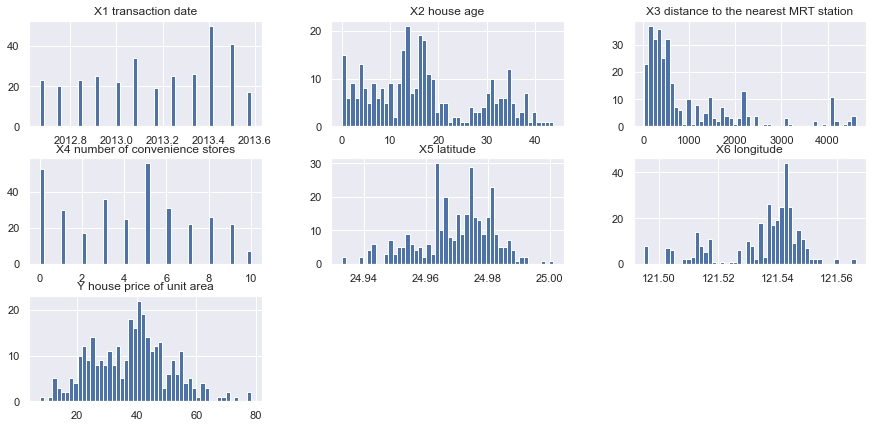

In [160]:
new_train_data.hist(bins=50, figsize=(15, 7))

In [161]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(new_train_data)
scaled_test_data = scaler.transform(test_data)

In [162]:
x_train = scaled_train_data[:, :-1]
y_train = scaled_train_data[:, -1]
x_test = scaled_test_data[:, :-1]
y_test = scaled_test_data[:, -1]

# Part e:
### Use scikit learn to test-train split train simple linear regression model and extract the weights to confirm your findings from the last question.

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

def model_train_test(x_train, y_train, x_test, y_test):
    linear_model = LinearRegression()
    linear_model.fit(x_train, y_train)
    y_train_pred = linear_model.predict(x_train)
    y_test_pred = linear_model.predict(x_test)

    mse_train = metrics.mean_squared_error(y_train, y_train_pred)
    mse_test = metrics.mean_squared_error(y_test, y_test_pred)
    r_squared_train = metrics.r2_score(y_train, y_train_pred)
    r_squared_test = metrics.r2_score(y_test, y_test_pred) 

    print('train_data report:')
    print('MSE: ', end='')
    print(mse_train)
    print('R_squared: ', end='')
    print(r_squared_train)

    print('test_data report:')
    print('MSE: ', end='')
    print(mse_test)
    print('R_squared: ', end='')
    print(r_squared_test)

In [164]:
model_train_test(x_train, y_train, x_test, y_test)

train_data report:
MSE: 0.013087957876542307
R_squared: 0.6093244091994814
test_data report:
MSE: 0.010680699663415092
R_squared: 0.6817629246321395
